# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.086401e+01     7.455979e+00
 * time: 0.0049800872802734375
     1     2.991588e+01     4.977798e+00
 * time: 0.02305293083190918
     2     2.127202e+01     4.123567e+00
 * time: 0.04548311233520508
     3     1.603710e+01     3.761207e+00
 * time: 0.06763911247253418
     4     1.125852e+01     1.953791e+00
 * time: 0.08938193321228027
     5     9.594777e+00     1.009278e+00
 * time: 0.11203694343566895
     6     9.027448e+00     1.267553e+00
 * time: 0.13042807579040527
     7     8.663234e+00     7.087527e-01
 * time: 0.14931297302246094
     8     8.422793e+00     6.876573e-01
 * time: 0.16827797889709473
     9     8.308386e+00     5.281979e-01
 * time: 0.1870710849761963
    10     8.204171e+00     4.812729e-01
 * time: 0.2059171199798584
    11     8.102513e+00     4.053542e-01
 * time: 0.22396612167358398
    12     8.098710e+00     7.140518e-01
 * time: 0.23829197883605957
    13     8.043555e+00     5.268818e-01
 * time:

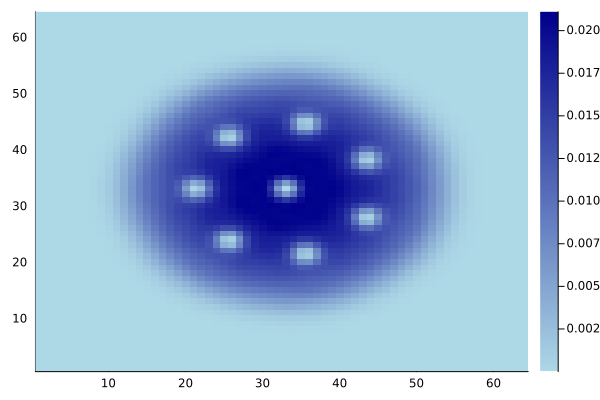

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)